In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("Spotify_Youtube.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Channel           20248 non-null  object 
 16  Views             20248 non-null  float6

In [19]:
data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
#Supression des colonnes non utilisées
unused = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title',]
data.drop(unused, axis=1, inplace=True)

In [20]:
# Vérification de valeurs nulles
data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [21]:
data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Channel           20248 non-null  object 
 16  Views             20248 non-null  float6

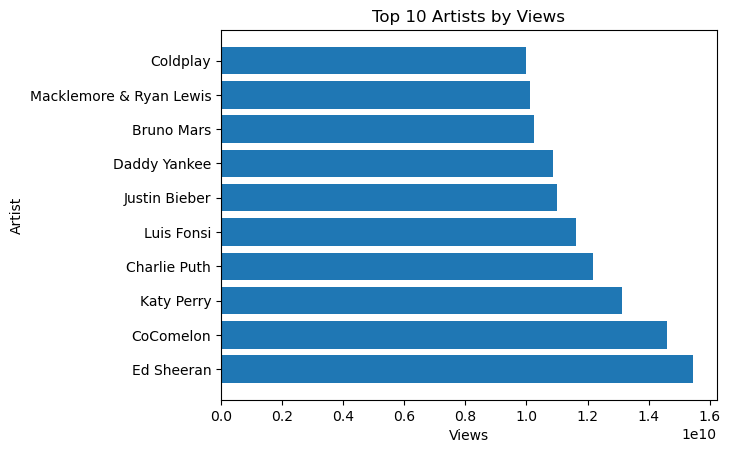

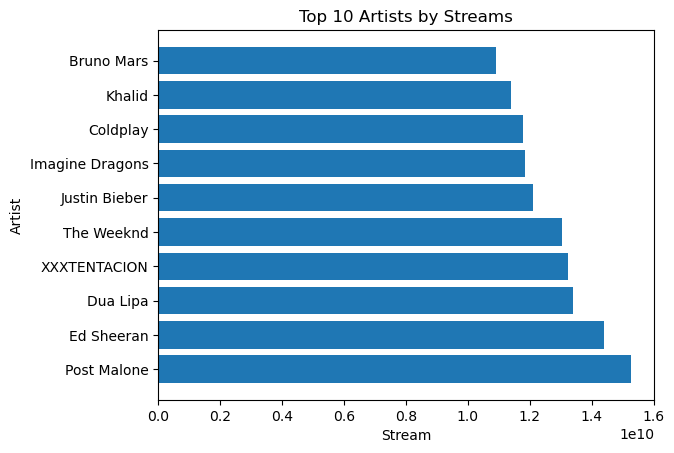

In [10]:
data_grouped = data.groupby('Artist').agg({'Views': 'sum', 'Stream': 'sum'}).reset_index()

data_views = data_grouped.sort_values('Views', ascending=False).head(10)
data_streams = data_grouped.sort_values('Stream', ascending=False).head(10)

plt.barh(data_views['Artist'], data_views['Views'])
plt.title('Top 10 Artists by Views')
plt.xlabel('Views')
plt.ylabel('Artist')
plt.show()

plt.barh(data_streams['Artist'], data_streams['Stream'])
plt.title('Top 10 Artists by Streams')
plt.xlabel('Stream')
plt.ylabel('Artist')
plt.show()

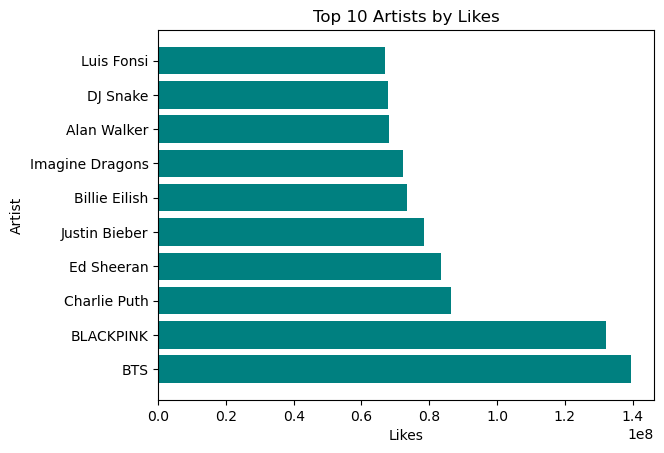

In [11]:
data_grouped = data.groupby('Artist').agg({'Views': 'sum', 'Stream': 'sum', 'Likes': 'sum'}).reset_index()
data_likes = data_grouped.sort_values('Likes', ascending=False).head(10)
plt.barh(data_likes['Artist'], data_likes['Likes'], color = 'teal')
plt.title('Top 10 Artists by Likes')
plt.xlabel('Likes')
plt.ylabel('Artist')
plt.show()

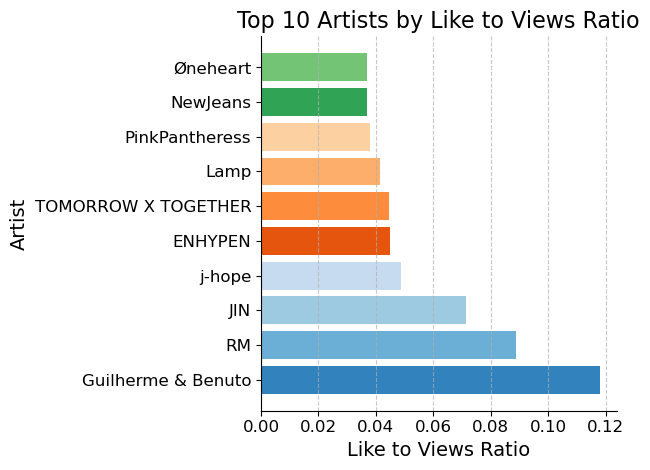

In [12]:
data_grouped['Like_to_Views_Ratio'] = data_grouped['Likes'] / data_grouped['Views']
data_ratio = data_grouped.sort_values('Like_to_Views_Ratio', ascending=False).head(10)
colors = plt.cm.tab20c(range(len(data_ratio)))
plt.barh(data_ratio['Artist'], data_ratio['Like_to_Views_Ratio'], color=colors)
plt.title('Top 10 Artists by Like to Views Ratio', fontsize=16)
plt.xlabel('Like to Views Ratio', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

array([[<AxesSubplot: title={'center': 'Danceability'}>,
        <AxesSubplot: title={'center': 'Energy'}>,
        <AxesSubplot: title={'center': 'Key'}>,
        <AxesSubplot: title={'center': 'Loudness'}>],
       [<AxesSubplot: title={'center': 'Speechiness'}>,
        <AxesSubplot: title={'center': 'Acousticness'}>,
        <AxesSubplot: title={'center': 'Instrumentalness'}>,
        <AxesSubplot: title={'center': 'Liveness'}>],
       [<AxesSubplot: title={'center': 'Valence'}>,
        <AxesSubplot: title={'center': 'Tempo'}>,
        <AxesSubplot: title={'center': 'Duration_ms'}>,
        <AxesSubplot: title={'center': 'Views'}>],
       [<AxesSubplot: title={'center': 'Likes'}>,
        <AxesSubplot: title={'center': 'Comments'}>,
        <AxesSubplot: title={'center': 'Stream'}>, <AxesSubplot: >]],
      dtype=object)

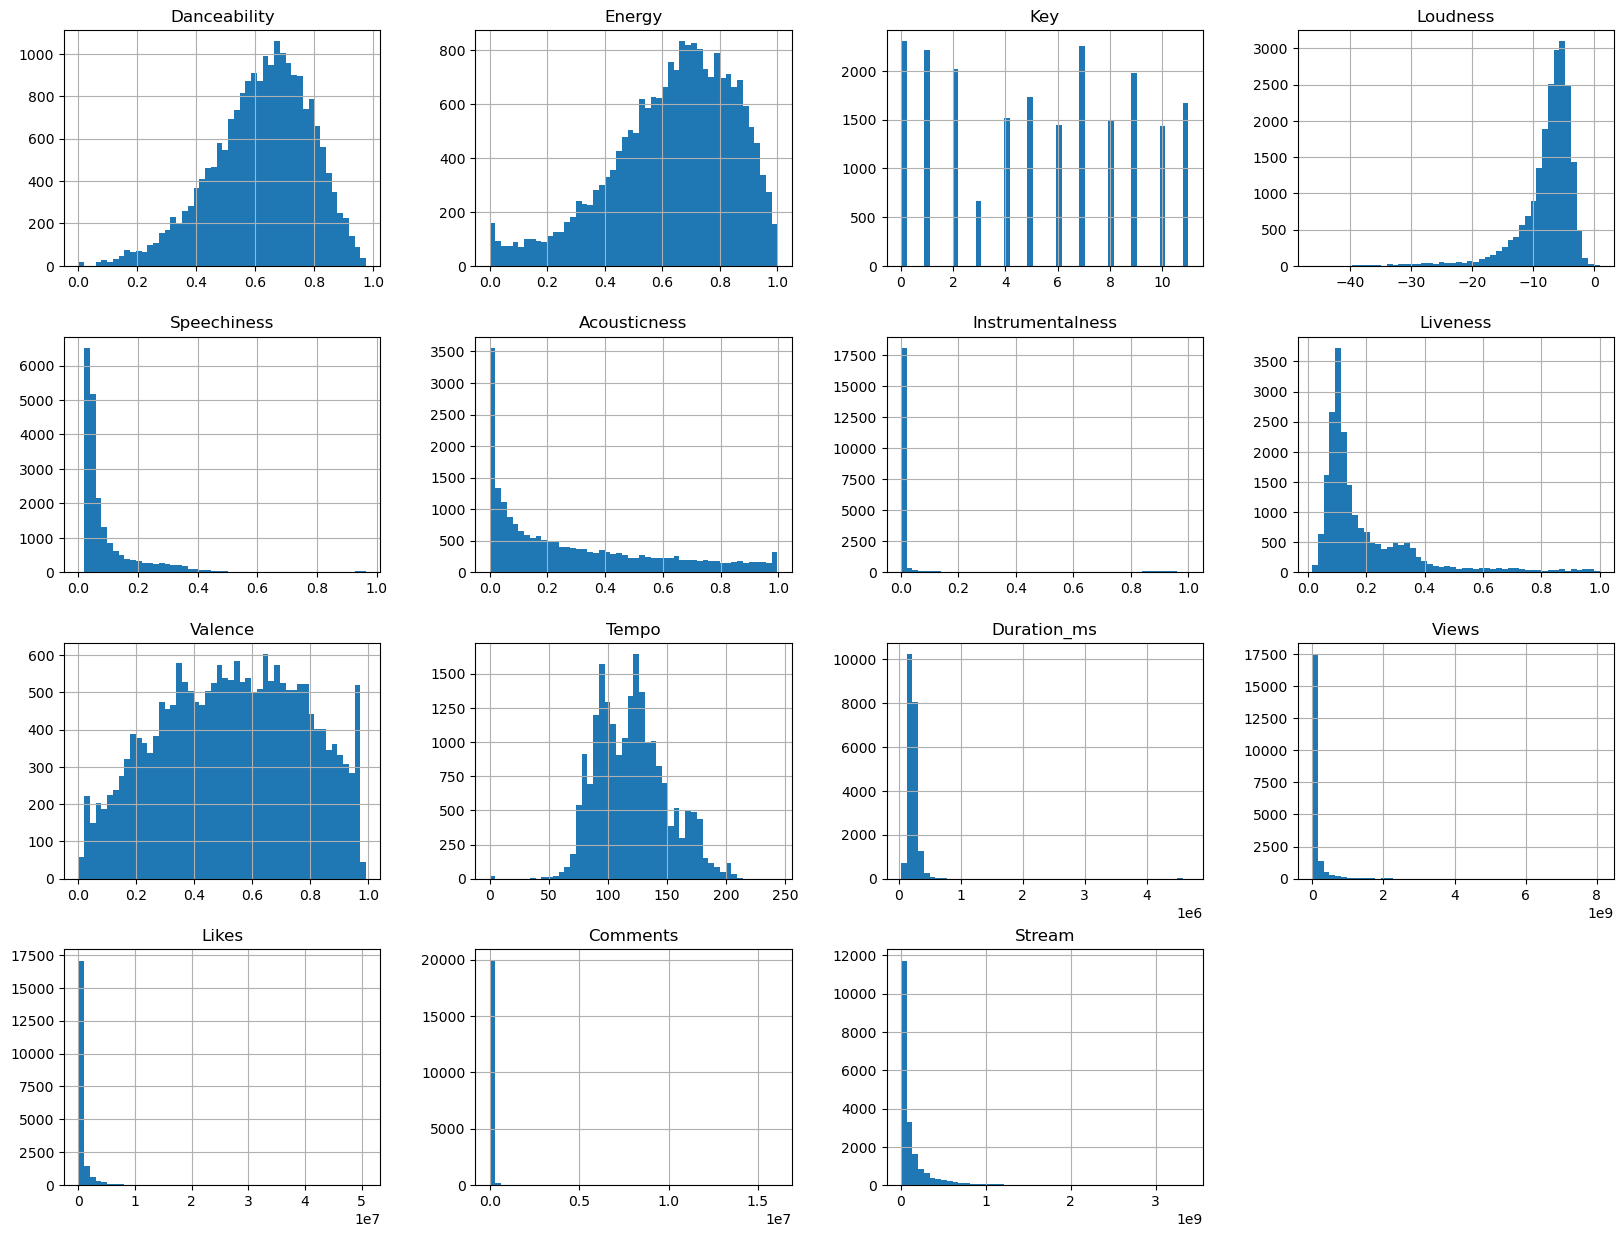

In [13]:
#Distribution of the numerical columns
numeric_cols = data.select_dtypes(include='number')
numeric_cols.hist(bins=50, figsize=(20,15))

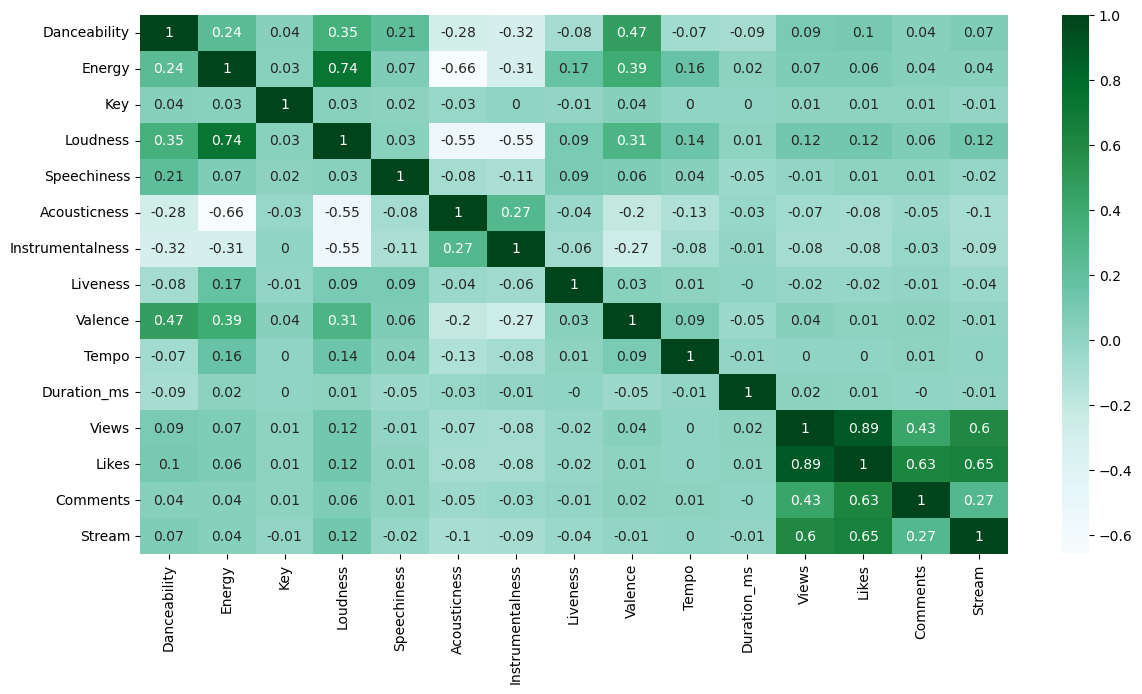

In [14]:
# Correlation matrix showing relationship between columns
fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(data=data.corr().round(2),annot=True,cmap="BuGn")
plt.show()

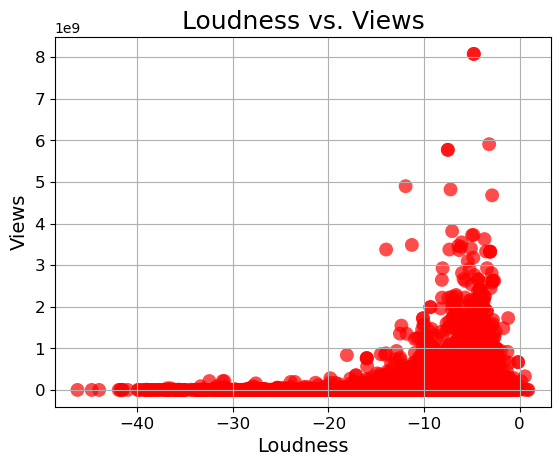

In [15]:
plt.scatter(data['Loudness'], data['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Views', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

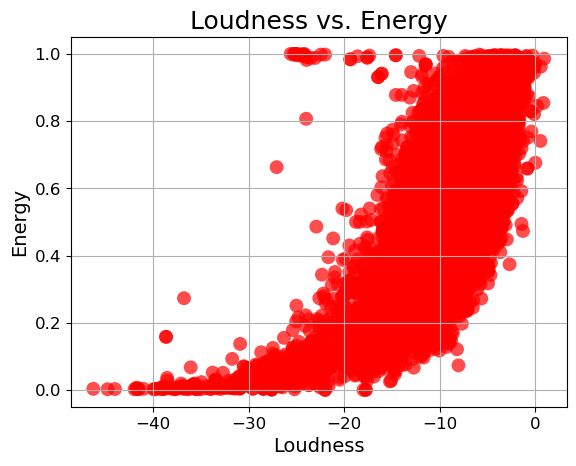

In [16]:
plt.scatter(data['Loudness'], data['Energy'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Energy', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

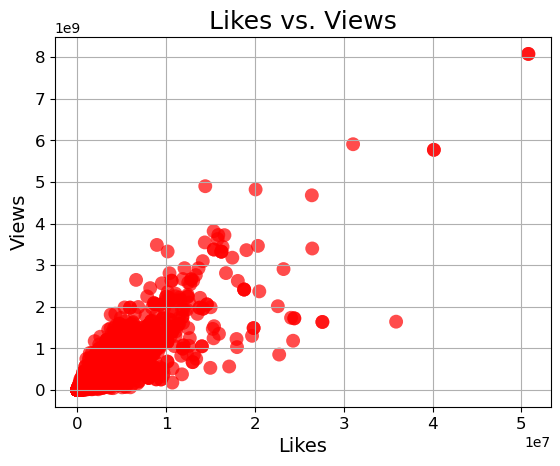

In [17]:
#Correlation between likes and views
plt.scatter(data['Likes'], data['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Likes vs. Views', fontsize=18)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()